In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting


In [2]:
# ------------------ 1. Load Dataset ------------------
df = pd.read_csv(r"C:\Users\maher\Desktop\Mall_Customers.csv")

print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# ------------------ 2. Select Features ------------------
features=['Annual Income (k$)', 'Spending Score (1-100)']
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [4]:
# ------------------ 3. Scaling ------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

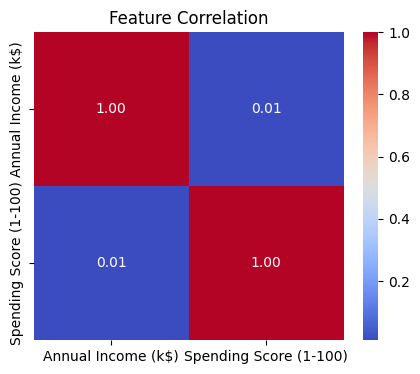

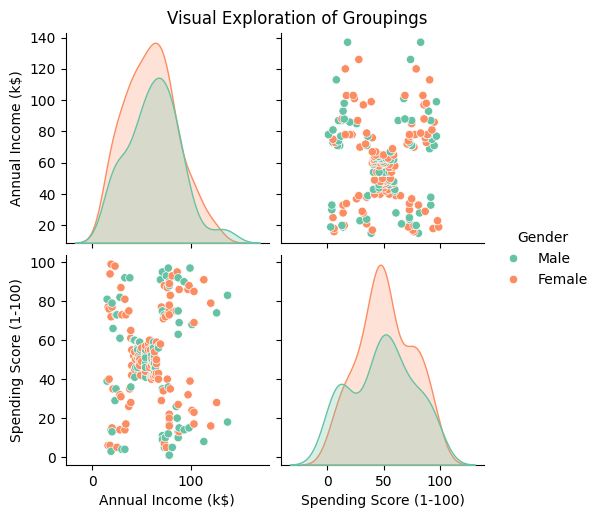

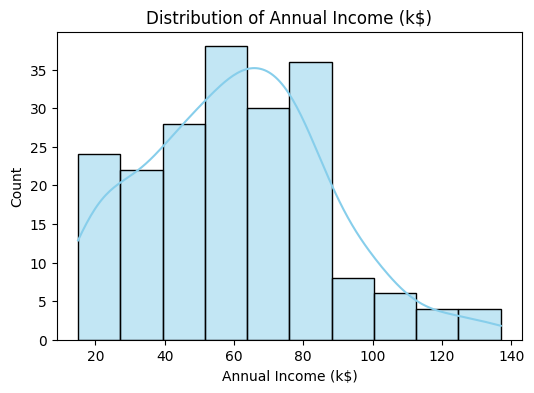

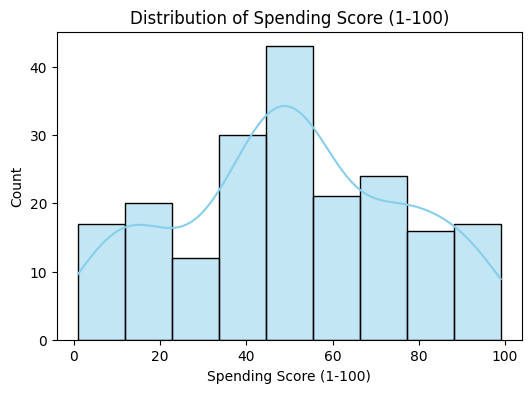

In [5]:
# ------------------ 4. Visual Exploration ------------------
# Correlation heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

# Pairplot to explore patterns
sns.pairplot(df, vars=features, hue="Gender", palette="Set2", diag_kind="kde")
plt.suptitle("Visual Exploration of Groupings", y=1.02)
plt.show()

# Distribution plots
for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

  File "C:\Users\maher\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


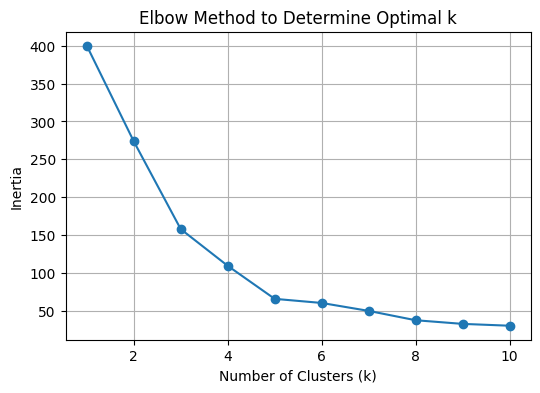

In [6]:
# ------------------ 5. Determine Optimal Clusters (Elbow Method) ------------------
inertia = []
K_range = range(1, 11)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [7]:
# ------------------ 6. Apply K-Means ------------------
# Pick k based on elbow method (usually 5 for this dataset)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


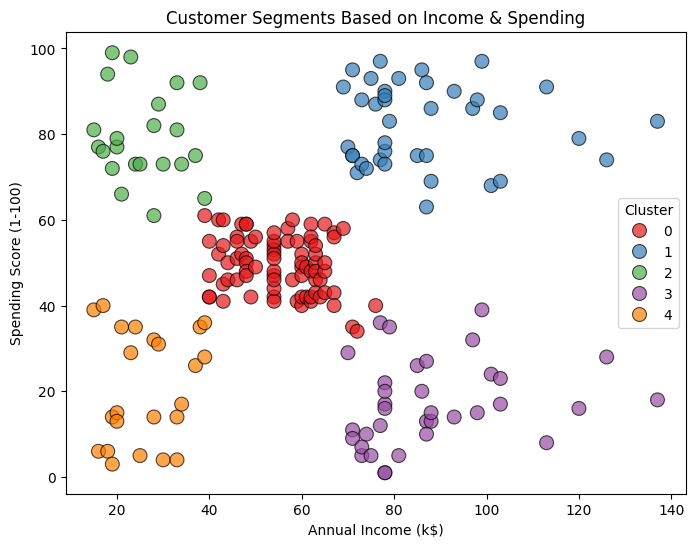

In [8]:
# ------------------ 7. Visualize Clusters ------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1',
    s=100,
    alpha=0.7,
    edgecolor='black'
)
plt.title('Customer Segments Based on Income & Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [9]:
# ------------------ 8. Cluster Summary ------------------
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Centers (Mean Values):")
print(cluster_summary)


Cluster Centers (Mean Values):
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
